In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
path = '../data/bikeshare'
os.path.exists(path)

True

In [4]:
os.listdir(path)

['2017-q1_trip_history_data.csv',
 '2017-q2_trip_history_data.csv',
 '2017-q3_trip_history_data.csv',
 '2017-q4_trip_history_data.csv']

In [7]:
data_files = ['2017-q1_trip_history_data.csv', '2017-q2_trip_history_data.csv',
              '2017-q3_trip_history_data.csv', '2017-q4_trip_history_data.csv']

# 1. collect_data

**numpy**

In [10]:
data_arr_list = []
for file in data_files:
    full_path = os.path.join(path, file)
#     print(full_path)
    data_arr = np.loadtxt(full_path, delimiter=',', dtype='str', skiprows=1)
    data_arr_list.append(data_arr)    

note:
```python
data_arr = np.loadtxt(full_path, delimiter=',', dtype='str', skiprows=1)
```
> if no dtype='str', data type will be float by default.

```
ValueError: could not convert string to float: '"Duration'
```

**pandas**

In [17]:
data_df_list = []
for file in data_files:
    full_path = os.path.join(path, file)
    data_df = pd.read_csv(full_path)
    data_df_list.append(data_df)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
data_df_list[0].head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,221834,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member
1,1676854,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual
2,1356956,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual
3,1327901,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual
4,1636768,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual


In [28]:
data_df_list[0].dtypes

Duration (ms)            int64
Start date              object
End date                object
Start station number     int64
Start station           object
End station number       int64
End station             object
Bike number             object
Member type             object
dtype: object

# 2. process data

**numpy**

In [20]:
duration_in_min_list = []
for data_arr in data_arr_list:
    duration_str_col = data_arr[:,0]
    duration_in_ms = np.core.defchararray.replace(duration_str_col,'"','')
    duration_in_min = duration_in_ms.astype('float') / 1000 / 60
    duration_in_min_list.append(duration_in_min)

In [21]:
duration_in_min_list[0]

array([ 3.69723333, 27.94756667, 22.61593333, ...,  7.05823333,
       17.48126667,  3.72415   ])

**pandas**

In [32]:
duration_min = data_df_list[0]['Duration (ms)']/1000/60
duration_min.head()

0     3.697233
1    27.947567
2    22.615933
3    22.131683
4    27.279467
Name: Duration (ms), dtype: float64

# 3. analyze_data

**numpy**

In [33]:
duration_mean_list = []
for i, duration in enumerate(duration_in_min_list):
    duration_mean = np.mean(duration)
    print('第{}季度的平均骑行时间：{:.2f}分钟'.format(i + 1, duration_mean))
    duration_mean_list.append(duration_mean)

第1季度的平均骑行时间：16.85分钟
第2季度的平均骑行时间：21.21分钟
第3季度的平均骑行时间：20.53分钟
第4季度的平均骑行时间：16.56分钟


**pandas**

In [35]:
duration_min.describe()

count    646586.000000
mean         16.854198
std          34.824587
min           1.000067
25%           6.220871
50%          10.439650
75%          17.740804
max        1434.442367
Name: Duration (ms), dtype: float64

In [37]:
duration_min.mean() #第1季度的平均骑行时间

16.85419817136982

In [41]:
mean_list = []
for i, data_df in enumerate(data_df_list):
    duration_min_mean = (data_df['Duration (ms)']/1000/60).mean()
    mean_list.append(duration_min_mean)
    print('第{}季度的平均骑行时间：{:.2f}分钟'.format(i + 1, duration_min_mean))

第1季度的平均骑行时间：16.85分钟
第2季度的平均骑行时间：21.21分钟
第3季度的平均骑行时间：20.53分钟
第4季度的平均骑行时间：16.56分钟


# 4. show_results

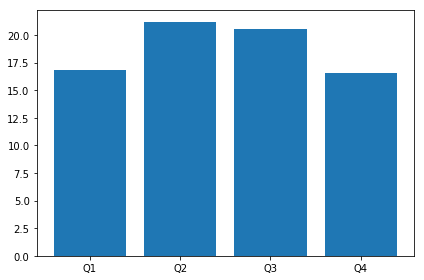

In [45]:
plt.figure()
plt.bar(range(len(mean_list)),mean_list)
plt.xticks(np.arange(4),['Q1','Q2','Q3','Q4'])
plt.tight_layout()

```python
"""
    明确任务：比较共享单车每个季度的平均骑行时间
"""
import os
import numpy as np
import matplotlib.pyplot as plt

data_path = './data/bikeshare'
data_filenames = ['2017-q1_trip_history_data.csv', '2017-q2_trip_history_data.csv',
                  '2017-q3_trip_history_data.csv', '2017-q4_trip_history_data.csv']


def collect_data():
    """
        Step 1: 数据收集
    """
    data_arr_list = []
    for data_filename in data_filenames:
        data_file = os.path.join(data_path, data_filename)
        data_arr = np.loadtxt(data_file, delimiter=',', dtype='str', skiprows=1)
        data_arr_list.append(data_arr)
    return data_arr_list


def process_data(data_arr_list):
    """
        Step 2: 数据处理
    """
    duration_in_min_list = []

    for data_arr in data_arr_list:
        duration_str_col = data_arr[:, 0]
        # 去掉双引号
        duration_in_ms = np.core.defchararray.replace(duration_str_col, '"', '')

        # 类型转换
        duration_in_min = duration_in_ms.astype('float') / 1000 / 60

        duration_in_min_list.append(duration_in_min)

    return duration_in_min_list


def analyze_data(data_arr_list):
    """
        Step 3: 数据分析
    """
    duration_mean_list = []

    for i, duration in enumerate(data_arr_list):
        duration_mean = np.mean(duration)
        print('第{}季度的平均骑行时间：{:.2f}分钟'.format(i + 1, duration_mean))
        duration_mean_list.append(duration_mean)

    return duration_mean_list


def show_results(duration_mean_list):
    """
        Step 4: 结果展示
    """
    plt.figure()
    plt.bar(range(len(duration_mean_list)), duration_mean_list)
    plt.show()


def main():
    """
        主函数
    """
    # 数据获取
    data_arr_list = collect_data()

    # 数据处理
    duration_ist = process_data(data_arr_list)

    # 数据分析
    duration_mean_list = analyze_data(duration_ist)

    # 结果展示
    show_results(duration_mean_list)


if __name__ == '__main__':
    main()
```